In [215]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_consistent_length
import joblib



In [216]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [217]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [218]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [219]:
data.shape

(10000, 14)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [221]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [222]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [223]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [224]:
data= data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [225]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [226]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [227]:
data=pd.get_dummies(data,drop_first=True)

In [228]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [229]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

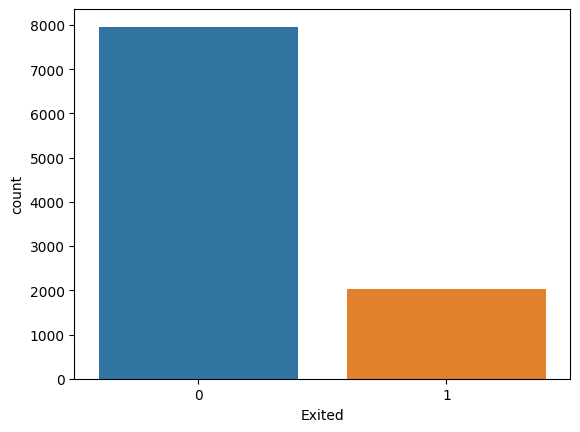

In [230]:
sns.countplot(data, x="Exited")

In [231]:
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [232]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [233]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

**Feature Scaling**

In [234]:
sc=StandardScaler()

In [235]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [236]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

**Handling imabalanced dataset with SMOT**

In [237]:
X_res,y_res= SMOTE().fit_resample(X,y)

In [238]:
X_res.value_counts()
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**SPLITTING DATASET INTO TRAINING AND TESTING SET**

In [239]:
X_train,X_test,y_train,y_test= train_test_split(X_res,y_res,test_size=0.20,random_state=42)

**Logistic Regression**

In [240]:
log=LogisticRegression()

In [241]:
log.fit(X_train,y_train)

LogisticRegression()

In [242]:
y_pred1=log.predict(X_test)

In [243]:
accuracy_score(y_test,y_pred1)

0.6635279347143754

In [244]:
precision_score(y_test,y_pred1)

0.6444444444444445

In [245]:
f1_score(y_test,y_pred1)

0.6668738346799254

In [246]:
recall_score(y_test,y_pred1)

0.690920798454604

**svm**

In [247]:
svm= svm.SVC()

In [248]:
svm.fit(X_train,y_train)

SVC()

In [249]:
y_pred2=svm.predict(X_test)

In [250]:
accuracy_score(y_test,y_pred2)

0.5778405524168236

In [251]:
precision_score(y_test,y_pred2)

0.5474885844748858

**K neighbours**

In [252]:
knn = KNeighborsClassifier()

In [253]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [254]:
y_pred3=knn.predict(X_test)

In [255]:
accuracy_score(y_test,y_pred3)

0.6905210295040803

In [256]:
precision_score(y_test,y_pred3)

0.6546644844517185

**Random Forest**

In [257]:
rf= RandomForestClassifier()

In [258]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [259]:
y_pred4= rf.predict(X_test)

In [260]:
accuracy_score(y_test,y_pred4)

0.8568738229755178

In [261]:
precision_score(y_test,y_pred4)

0.8460567823343849

Testing

In [262]:
final_data = pd.DataFrame(
    {
        "Models": ["LR", "SVC", "KNN", "RF"],
        "ACC": [
            accuracy_score(y_test, y_pred1),
            accuracy_score(y_test, y_pred2),
            accuracy_score(y_test, y_pred3),
            accuracy_score(y_test, y_pred4),
        ],
    }
)

In [263]:
final_data

,Models,ACC
0,LR,0.663528
1,SVC,0.577841
2,KNN,0.690521
3,RF,0.856874


<Axes: xlabel='Models', ylabel='ACC'>

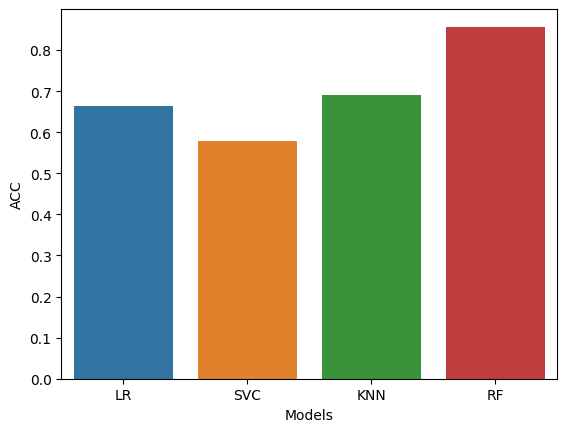

In [264]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [269]:
def prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols):
    geo_spain = 0
    geo_germany = 0
    gender_male = 0

    if geo == 'Germany':
        geo_germany = 1
    elif geo == 'Spain':
        geo_spain = 1

    if gender == 'Male':
        gender_male = 1

    data_points = pd.DataFrame(columns = cols)
    vals = [cs, age, tenure, balance, num_of_products, has_card, am, es, geo_germany, geo_spain, gender_male]
    data_points.loc[len(data_points.index)] = vals

    scaler = StandardScaler()
    features = list(X_train.columns)

    for col in features:
        data_points[col] = scaler.fit_transform(data_points[col].to_numpy().reshape(-1,1))

    predict = rf.predict(data_points)[0]

    if predict == 0:

        print("This Customer is more likely to Stay")

    else:

        print("This Customer is more likely to exit the bank")



In [270]:
cs = 815
age = 39
tenure = 6
balance = 0
num_of_products= 1
has_card = 1
am = 1
es = 85167.88
geo = 'Spain'
gender = 'Female'
cols = X_train.columns
prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols)

This Customer is more likely to exit the bank


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**SAVE THE MODEL**

In [273]:
dump(randomForest_classifier, 'random_forest_model.joblib')

NameError: ignored

RandomForestClassifier()